In [1]:
import pandas as pd 
import numpy as np 
from utils.utility_functions import *
from src.MetNormalizer import MetNorm

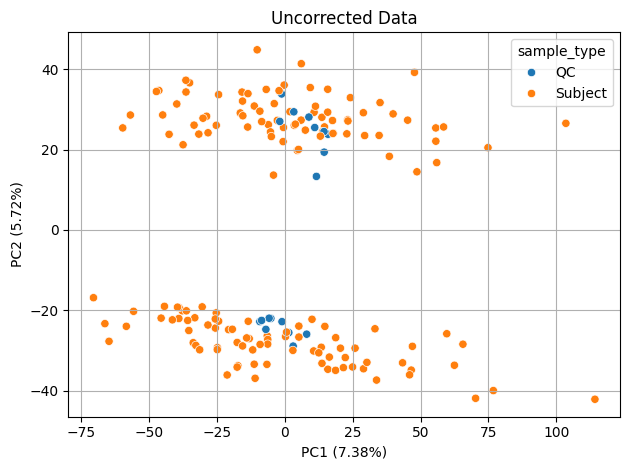

In [2]:
M = pd.read_csv("MetNormalizer-Diagram/sample.info.csv")
D = pd.read_csv("MetNormalizer-Diagram/data.csv")

M = M.set_index("sample.name")

D = D.set_index("name").iloc[:,2:].T
M.columns = M.columns.str.replace("class","sample_type")
pca_plot(D,M,title='Uncorrected Data')

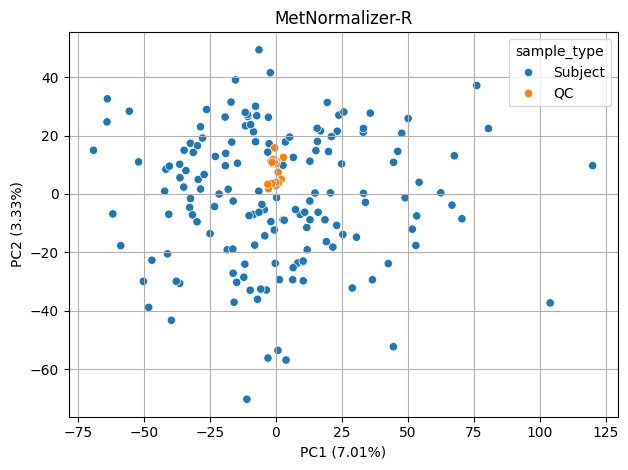

In [3]:
D = pd.read_csv("MetNormalizer-Diagram/svr_normalization_result/data_svr_normalization.csv")
D = D.set_index("name").iloc[:,5:]
D = D.T
pca_plot(D,M,title='MetNormalizer-R')

In [4]:
metnorm = MetNorm(D,M,cv=False)

In [5]:
results = metnorm.fit_transform()

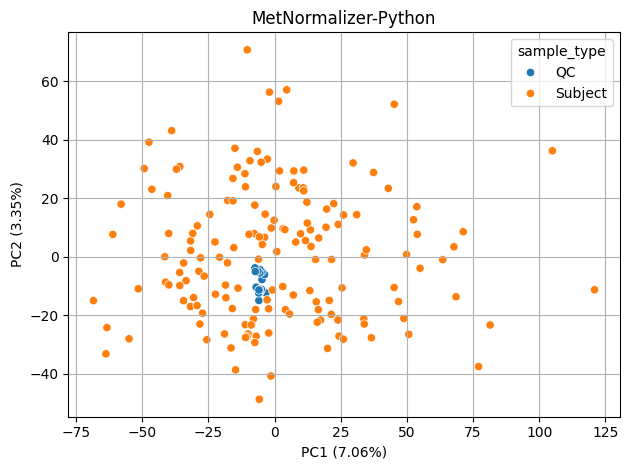

In [6]:
pca_plot(results,M,title='MetNormalizer-Python')

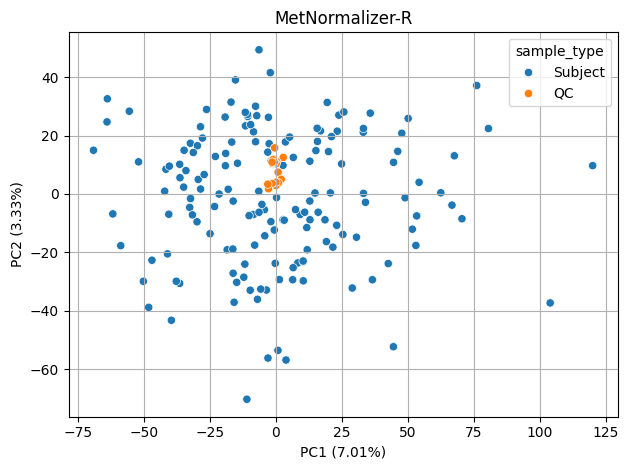
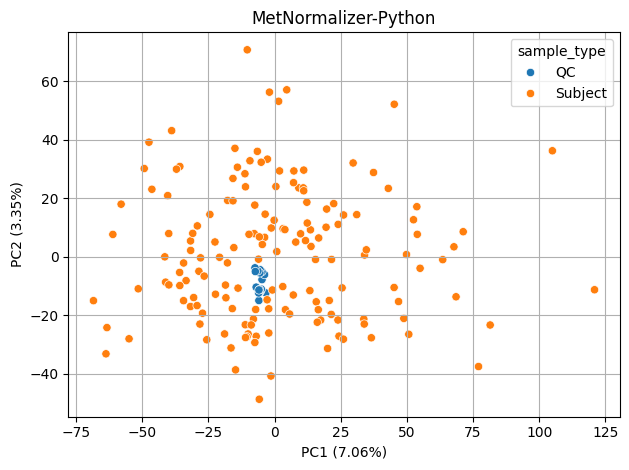